In [91]:
import geopandas
import json, numpy as np, pandas as pd
from values import party_colors

from shapely.geometry import Polygon

from generate_data_frame import generate_normed_df_votes_by_allignement
from load_files import load_code_circo2name

In [39]:
data_folder = 'imported_data/map_circo/'
map_file = data_folder + 'france-circonscriptions-legislatives-2012.shp'

gdf = geopandas.read_file(map_file)
circo_name2code = {name: code for code, name in load_code_circo2name().items()}

df_votes_by_allignement = generate_normed_df_votes_by_allignement()

In [95]:
circo2color = {}
for circo, row in df_votes_by_allignement.iterrows():
    circo2color[circo_name2code[circo]] = party_colors[row.argmax()]

In [115]:
gdf['circo_color'] = gdf.apply(
    lambda line: circo2color.get(f'{line["code_dpt"]}{int(line["num_circ"]):02d}'),
    axis=1,
)
gdf = gdf[~gdf['circo_color'].isna()]

C:\Users\matth\AppData\Local\Temp\ipykernel_6904\4148936559.py:1: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf.plot("ID", legend=False, color=gdf['circo_color'])


<AxesSubplot: >

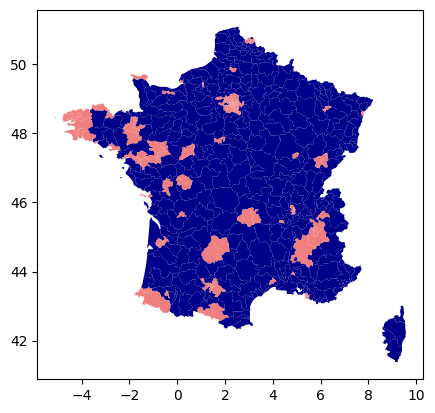

In [117]:
gdf.plot("ID", legend=False, color=gdf['circo_color'])

In [41]:
len(circo_name2code), len(load_code_circo2name())

(577, 577)

In [29]:
lines = load_raw_votes()

In [30]:
lines

[('01004', '99889', 53391, 44873, 44.92, 'HUMANITE SOUVERAINE', 1.0, 0.0),
 ('01004',
  '99889',
  53391,
  44873,
  44.92,
  'POUR UNE DEMOCRATIE REELLE : DECIDONS NOUS-MEMES !',
  0.0,
  0.0),
 ('01004',
  '99889',
  53391,
  44873,
  44.92,
  'LA FRANCE FIERE, MENEE PAR MARION MARECHAL ET SOUTENUE PAR ÉRIC ZEMMOUR',
  3200.0,
  5.99),
 ('01004', '99889', 53391, 44873, 44.92, 'LFI - UP', 2830.0, 5.3),
 ('01004', '99889', 53391, 44873, 44.92, 'La FRANCE REVIENT', 21539.5, 40.34),
 ('01004', '99889', 53391, 44873, 44.92, 'EUROPE ÉCOLOGIE', 2267.0, 4.25),
 ('01004', '99889', 53391, 44873, 44.92, 'FREE PALESTINE', 6.0, 0.01),
 ('01004', '99889', 53391, 44873, 44.92, 'PARTI ANIMALISTE', 919.5, 1.72),
 ('01004',
  '99889',
  53391,
  44873,
  44.92,
  'PARTI REVOLUTIONNAIRE COMMUNISTES',
  0.0,
  0.0),
 ('01004', '99889', 53391, 44873, 44.92, 'PARTI PIRATE', 33.0, 0.06),
 ('01004', '99889', 53391, 44873, 44.92, "BESOIN D'EUROPE", 7676.0, 14.38),
 ('01004', '99889', 53391, 44873, 44.92, 'PA

In [45]:
[circo_name2code[x] for x in df_votes_by_allignement.index.values]

['9307',
 '9306',
 '9302',
 '9301',
 '9410',
 '9309',
 '9201',
 '9411',
 '9211',
 '9304',
 '4402',
 '7511',
 '7515',
 '7514',
 '7508',
 '7507',
 '7501',
 '7502',
 '7503',
 '7506',
 '7505',
 '7513',
 '7512',
 '7510',
 '7504',
 '7509',
 '7516',
 '7517',
 '7518',
 '9505',
 '3104',
 '9311',
 '3508',
 '9409',
 '9204',
 '3402',
 '6906',
 '9402',
 '4404',
 '6701',
 '9202',
 '3803',
 '3502',
 '3302',
 '3501',
 '5902',
 '6902',
 '6901',
 '6903',
 '6904',
 '9305',
 '4401',
 '4403',
 '9310',
 '3801',
 '3303',
 '5901',
 '9406',
 '9508',
 '3101',
 '9213',
 '9105',
 '6702',
 '3103',
 '7601',
 '6703',
 '9407',
 '9106',
 '3301',
 '3701',
 '9212',
 '3109',
 '9303',
 '4405',
 '9101',
 '9210',
 '6907',
 '9208',
 '7710',
 '7603',
 '9205',
 '3307',
 '9510',
 '9401',
 '9203',
 '2902',
 '7811',
 '3102',
 '1401',
 '3503',
 '1402',
 '9308',
 '6914',
 '5402',
 '4902',
 '9506',
 '9405',
 '4202',
 '9408',
 '8602',
 '1701',
 '7804',
 '2901',
 '9110',
 '7901',
 '9312',
 '7805',
 '5909',
 '2907',
 '4408',
 '9504',
 

In [81]:
gdf.iloc[0,6].fill_color 

AttributeError: 'Polygon' object has no attribute 'fill_color'

In [66]:
help(gdf.iloc[0,6] ) 

Help on Polygon in module shapely.geometry.polygon object:

class Polygon(shapely.geometry.base.BaseGeometry)
 |  Polygon(shell=None, holes=None)
 |  
 |  A geometry type representing an area that is enclosed by a linear ring.
 |  
 |  A polygon is a two-dimensional feature and has a non-zero area. It may
 |  have one or more negative-space "holes" which are also bounded by linear
 |  rings. If any rings cross each other, the feature is invalid and
 |  operations on it may fail.
 |  
 |  Parameters
 |  ----------
 |  shell : sequence
 |      A sequence of (x, y [,z]) numeric coordinate pairs or triples, or
 |      an array-like with shape (N, 2) or (N, 3).
 |      Also can be a sequence of Point objects.
 |  holes : sequence
 |      A sequence of objects which satisfy the same requirements as the
 |      shell parameters above
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A 

In [74]:
help(Polygon)

Help on class Polygon in module shapely.geometry.polygon:

class Polygon(shapely.geometry.base.BaseGeometry)
 |  Polygon(shell=None, holes=None)
 |  
 |  A geometry type representing an area that is enclosed by a linear ring.
 |  
 |  A polygon is a two-dimensional feature and has a non-zero area. It may
 |  have one or more negative-space "holes" which are also bounded by linear
 |  rings. If any rings cross each other, the feature is invalid and
 |  operations on it may fail.
 |  
 |  Parameters
 |  ----------
 |  shell : sequence
 |      A sequence of (x, y [,z]) numeric coordinate pairs or triples, or
 |      an array-like with shape (N, 2) or (N, 3).
 |      Also can be a sequence of Point objects.
 |  holes : sequence
 |      A sequence of objects which satisfy the same requirements as the
 |      shell parameters above
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A s

In [96]:
gdf

,ID,code_dpt,code_reg,nom_dpt,nom_reg,num_circ,geometry
0,33004,33,75,GIRONDE,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,4,"POLYGON ((-0.45495 44.95342, -0.40932 44.9476,..."
1,38001,38,84,ISERE,AUVERGNE-RHONE-ALPES,1,"POLYGON ((5.80529 45.2062, 5.75468 45.19679, 5..."
2,59010,59,32,NORD,NORD-PAS-DE-CALAIS-PICARDIE,10,"POLYGON ((3.05874 50.78071, 3.08067 50.77286, ..."
3,33007,33,75,GIRONDE,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,7,"POLYGON ((-0.61065 44.82247, -0.60305 44.81848..."
4,ZA001,ZA,01,GUADELOUPE,GUADELOUPE,1,"MULTIPOLYGON (((-61.49348 16.35364, -61.45097 ..."
...,...,...,...,...,...,...,...
561,ZX001,ZX,-,SAINT-MARTIN/SAINT-BARTHELEMY,-,1,"MULTIPOLYGON (((-63.09622 18.06261, -63.08109 ..."
562,ZW001,ZW,-,WALLIS-ET-FUTUNA,-,1,"MULTIPOLYGON (((-176.25085 -13.29059, -176.224..."
563,ZP001,ZP,-,POLYNESIE-FRANCAISE,-,1,"MULTIPOLYGON (((-150.65198 -17.66457, -150.628..."
564,ZP002,ZP,-,POLYNESIE-FRANCAISE,-,2,"MULTIPOLYGON (((-153.03842 -22.64486, -153.033..."


C:\Users\matth\AppData\Local\Temp\ipykernel_6904\1979349948.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf[gdf.centroid.map(lambda x : x.x > -30 and x.y > 25)].plot("ID", legend=False, facecolor='grey')


<AxesSubplot: >

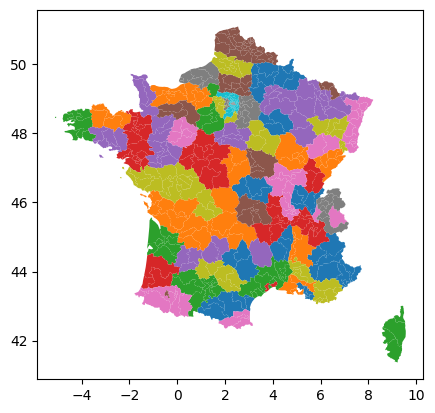

In [80]:
gdf[gdf.centroid.map(lambda x : x.x > -30 and x.y > 25)].plot("ID", legend=False, facecolor='grey')

In [79]:
help(gdf[gdf.centroid.map(lambda x : x.x > -30 and x.y > 25)].plot)

Help on GeoplotAccessor in module geopandas.plotting object:

class GeoplotAccessor(pandas.plotting._core.PlotAccessor)
 |  GeoplotAccessor(data: 'Series | DataFrame') -> 'None'
 |  
 |  Plot a GeoDataFrame.
 |  
 |  Generate a plot of a GeoDataFrame with matplotlib.  If a
 |  column is specified, the plot coloring will be based on values
 |  in that column.
 |  
 |  Parameters
 |  ----------
 |  column : str, np.array, pd.Series (default None)
 |      The name of the dataframe column, np.array, or pd.Series to be plotted.
 |      If np.array or pd.Series are used then it must have same length as
 |      dataframe. Values are used to color the plot. Ignored if `color` is
 |      also set.
 |  kind: str
 |      The kind of plots to produce. The default is to create a map ("geo").
 |      Other supported kinds of plots from pandas:
 |  
 |      - 'line' : line plot
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : Bo

C:\Users\matth\AppData\Local\Temp\ipykernel_6904\813308414.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  help(gdf[gdf.centroid.map(lambda x : x.x > -30 and x.y > 25)].plot)


<AxesSubplot: >

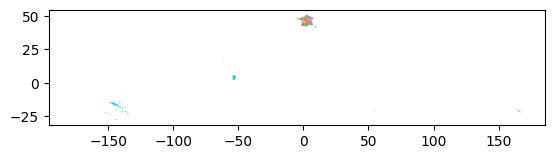

In [14]:
gdf.plot("ID", legend=False)

In [34]:
generate_df_votes_by_allignement()

lines = load_raw_votes()
code_circo2name = load_code_circo2name()
party_alignement = load_party_alignement()

In [35]:
code_circo2name

{'0104': 'Ain 4ème circonscription',
 '0105': 'Ain 5ème circonscription',
 '0103': 'Ain 3ème circonscription',
 '0102': 'Ain 2ème circonscription',
 '0101': 'Ain 1ère circonscription',
 '0204': 'Aisne 4ème circonscription',
 '0201': 'Aisne 1ère circonscription',
 '0205': 'Aisne 5ème circonscription',
 '0203': 'Aisne 3ème circonscription',
 '0202': 'Aisne 2ème circonscription',
 '0303': 'Allier 3ème circonscription',
 '0301': 'Allier 1ère circonscription',
 '0302': 'Allier 2ème circonscription',
 '0401': 'Alpes-de-Haute-Provence 1ère circonscription',
 '0402': 'Alpes-de-Haute-Provence 2ème circonscription',
 '0502': 'Hautes-Alpes 2ème circonscription',
 '0501': 'Hautes-Alpes 1ère circonscription',
 '0602': 'Alpes-Maritimes 2ème circonscription',
 '0607': 'Alpes-Maritimes 7ème circonscription',
 '0605': 'Alpes-Maritimes 5ème circonscription',
 '0609': 'Alpes-Maritimes 9ème circonscription',
 '0604': 'Alpes-Maritimes 4ème circonscription',
 '0606': 'Alpes-Maritimes 6ème circonscription',
